In [1]:
 # Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataa= pd.read_csv('C:\\Users\\nEW u\\Downloads\\cluster-1.csv.csv')

In [3]:
dataa

,City #,City,%age Black,%age Hispanic,%age Asian,Median Age,Unemployment rate,Per capita income
0,1,Albuquerque,3,35,2,32,5,18
1,2,Atlanta,67,2,1,31,5,22
2,3,Austin,12,23,3,29,3,19
3,4,Baltimore,59,1,1,33,11,22
4,5,Boston,26,11,5,30,5,24
5,6,Charlotte,32,1,2,32,3,20
6,7,Chicago,39,20,4,31,9,24
7,8,Cincinnati,38,1,1,31,8,21
8,9,Cleveland,47,5,1,32,13,22
9,10,Columbus,23,1,2,29,3,13


In [4]:

print(dataa.describe())


         City #  %age Black  %age Hispanic  %age Asian  Median Age  \
count  49.00000   49.000000      49.000000   49.000000   49.000000   
mean   25.00000   24.346939      14.591837    6.040816   31.877551   
std    14.28869   18.110254      16.472096   11.144803    1.996170   
min     1.00000    1.000000       1.000000    1.000000   28.000000   
25%    13.00000   11.000000       3.000000    1.000000   30.000000   
50%    25.00000   22.000000       6.000000    2.000000   32.000000   
75%    37.00000   31.000000      23.000000    5.000000   33.000000   
max    49.00000   76.000000      69.000000   71.000000   37.000000   

       Unemployment rate  Per capita income  
count          49.000000          49.000000  
mean            7.020408          20.918367  
std             2.688632           3.334396  
min             3.000000          13.000000  
25%             5.000000          19.000000  
50%             7.000000          21.000000  
75%             9.000000          23.000000  
m

In [5]:
dataa.shape

(49, 8)

In [6]:
print(dataa.columns.values)


['City #' 'City' '%age Black' '%age Hispanic' '%age Asian' 'Median Age'
 'Unemployment rate' 'Per capita income']


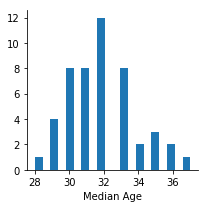

In [7]:
g = sns.FacetGrid(dataa)
g.map(plt.hist, 'Median Age', bins=20)

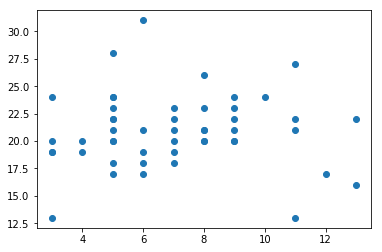

In [8]:
plt.scatter(dataa['Unemployment rate'],dataa['Per capita income'])

In [9]:
data= dataa.drop(['City','City #'], axis=1)


In [10]:
# Let's now build the K-Means model.
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km= KMeans(n_clusters=3).fit(data) 
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
y_predicted=km.fit_predict(data)

In [12]:
km.cluster_centers_

array([[10.8       , 52.6       ,  3.        , 31.6       ,  8.8       ,
        17.2       ],
       [17.09090909, 11.93939394,  7.57575758, 31.87878788,  6.12121212,
        21.18181818],
       [52.27272727,  5.27272727,  2.81818182, 32.        ,  8.90909091,
        21.81818182]])

In [13]:
km.n_clusters

3

In [14]:
data['cluster']=y_predicted

In [15]:
data['city']=dataa['City']

In [16]:
data.head()

,%age Black,%age Hispanic,%age Asian,Median Age,Unemployment rate,Per capita income,cluster,city
0,3,35,2,32,5,18,0,Albuquerque
1,67,2,1,31,5,22,2,Atlanta
2,12,23,3,29,3,19,1,Austin
3,59,1,1,33,11,22,2,Baltimore
4,26,11,5,30,5,24,1,Boston


In [17]:
data.cluster.unique()

array([0, 2, 1], dtype=int64)

In [18]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df1

,%age Black,%age Hispanic,%age Asian,Median Age,Unemployment rate,Per capita income,cluster,city
0,3,35,2,32,5,18,0,Albuquerque
13,3,69,1,29,11,13,0,El Paso
23,14,40,10,31,11,21,0,Los Angeles
25,27,63,1,36,12,17,0,Miami
40,7,56,1,30,5,17,0,San Antonio


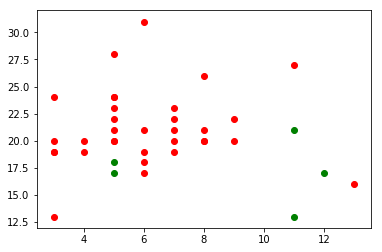

In [19]:
plt.scatter(df1['Unemployment rate'],df1['Per capita income'], color='green')
plt.scatter(df2['Unemployment rate'],df2['Per capita income'], color='red')


In [20]:
data

,%age Black,%age Hispanic,%age Asian,Median Age,Unemployment rate,Per capita income,cluster,city
0,3,35,2,32,5,18,0,Albuquerque
1,67,2,1,31,5,22,2,Atlanta
2,12,23,3,29,3,19,1,Austin
3,59,1,1,33,11,22,2,Baltimore
4,26,11,5,30,5,24,1,Boston
5,32,1,2,32,3,20,1,Charlotte
6,39,20,4,31,9,24,2,Chicago
7,38,1,1,31,8,21,2,Cincinnati
8,47,5,1,32,13,22,2,Cleveland
9,23,1,2,29,3,13,1,Columbus


In [21]:
data_elbow= data.drop(['city','cluster'], axis=1)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
from IPython.display import display, HTML


In [23]:
import yellowbrick as yb
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(data_elbow)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ModuleNotFoundError: No module named 'sklearn.metrics._classification'

In [ ]:
#Sum of squared distances of samples to their closest cluster center.
km.inertia_